In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:

df = pd.read_csv("Mall_Customers.csv")

In [6]:


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)



In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

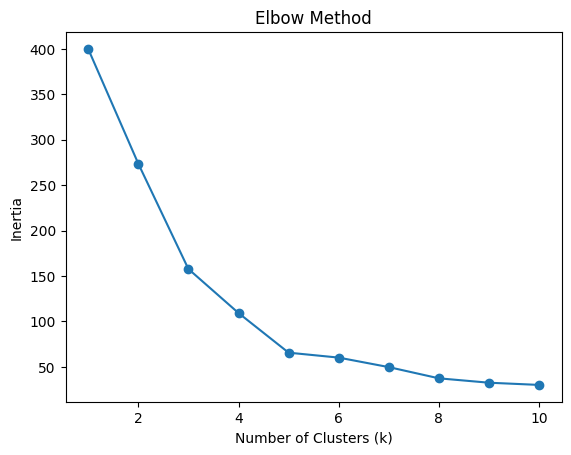

In [7]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

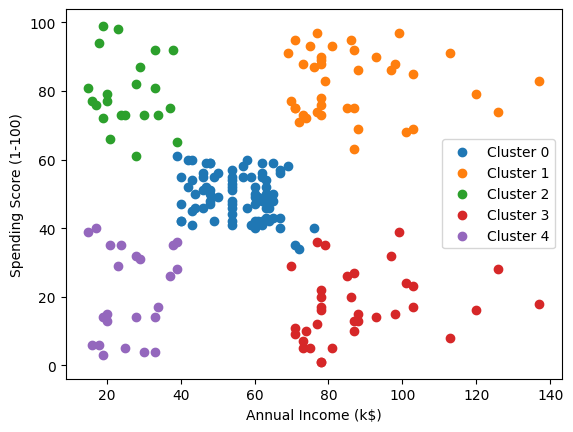

Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [4]:

for c in range(5):
    plt.scatter(df[df['Cluster'] == c]['Annual Income (k$)'],
                df[df['Cluster'] == c]['Spending Score (1-100)'],
                label=f'Cluster {c}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print(df.groupby('Cluster')['Spending Score (1-100)'].mean())